In [103]:
import platform

# Get the processor information
processor = platform.processor()

# Print the processor information
print("CPU:", processor)

CPU: Intel64 Family 6 Model 78 Stepping 3, GenuineIntel


In [30]:
# DATA LOADING, ANALYSIS AND VISUALIZATION
articles = pd.read_csv("D:/New folder/FYP/articles.csv")


articles.columns

Index(['article_id', 'product_code', 'prod_name', 'product_type_no',
       'product_type_name', 'product_group_name', 'graphical_appearance_no',
       'graphical_appearance_name', 'colour_group_code', 'colour_group_name',
       'perceived_colour_value_id', 'perceived_colour_value_name',
       'perceived_colour_master_id', 'perceived_colour_master_name',
       'department_no', 'department_name', 'index_code', 'index_name',
       'index_group_no', 'index_group_name', 'section_no', 'section_name',
       'garment_group_no', 'garment_group_name', 'detail_desc'],
      dtype='object')

In [31]:
articles.head(3)

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.


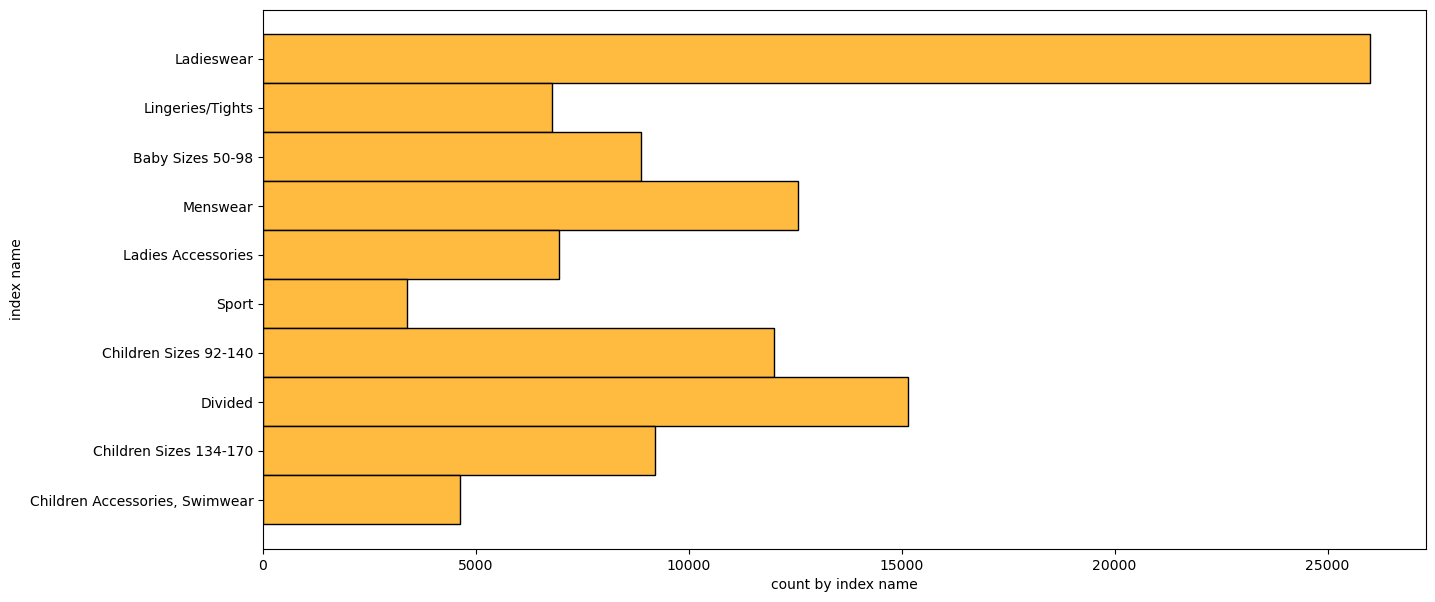

In [32]:
f, ax = plt.subplots(figsize=(15, 7))
ax = sns.histplot(data=articles, y='index_name', color='orange')
ax.set_xlabel('count by index name')
ax.set_ylabel('index name')
plt.show()

In [33]:
fig = px.sunburst(articles, path=['index_group_name', 'index_name'],width=800,
    height=800,color_discrete_sequence=px.colors.cyclical.Edge)
fig.show()

In [34]:
fig = px.sunburst(articles, path=['product_group_name', 'product_type_name'],width=800,
    height=800,color_discrete_sequence=px.colors.cyclical.Edge)
fig.show()

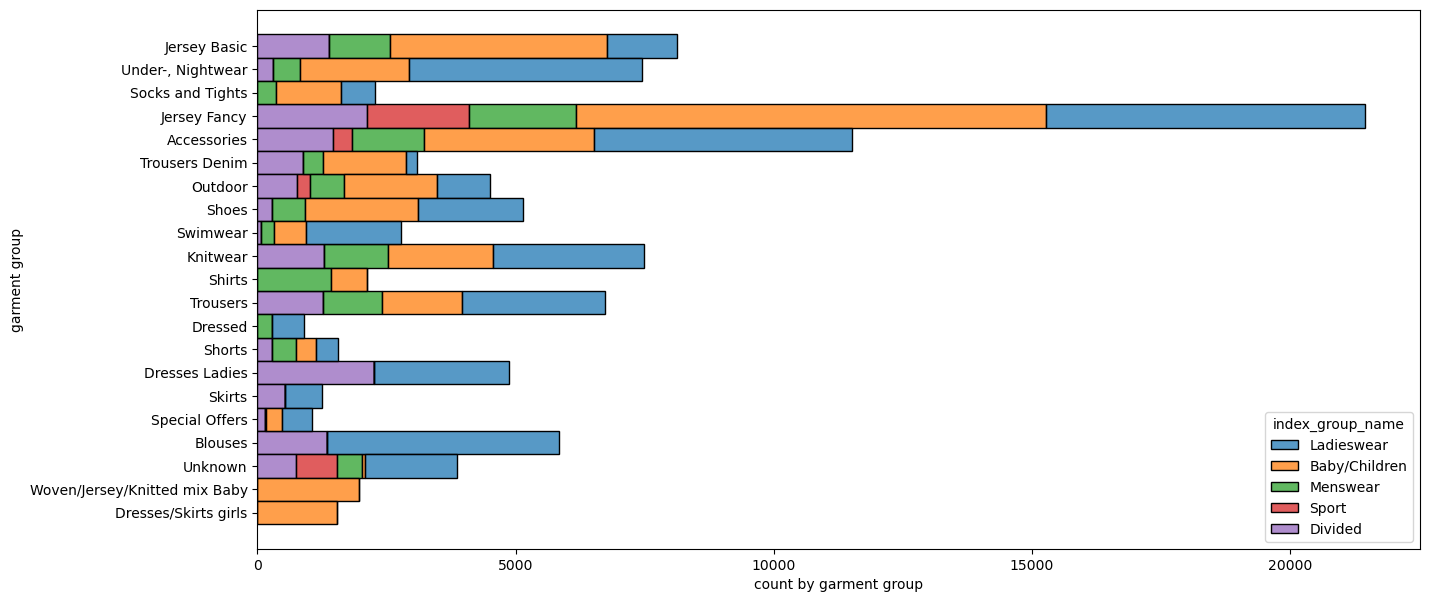

In [35]:
f, ax = plt.subplots(figsize=(15, 7))
ax = sns.histplot(data=articles, y='garment_group_name', color='orange', hue='index_group_name', multiple="stack")
ax.set_xlabel('count by garment group')
ax.set_ylabel('garment group')
plt.show()

In [36]:
customers = pd.read_csv("D:/New folder/FYP/customers.csv")
customers.head(3)

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...


In [37]:
customers = customers.replace("NONE", "None")

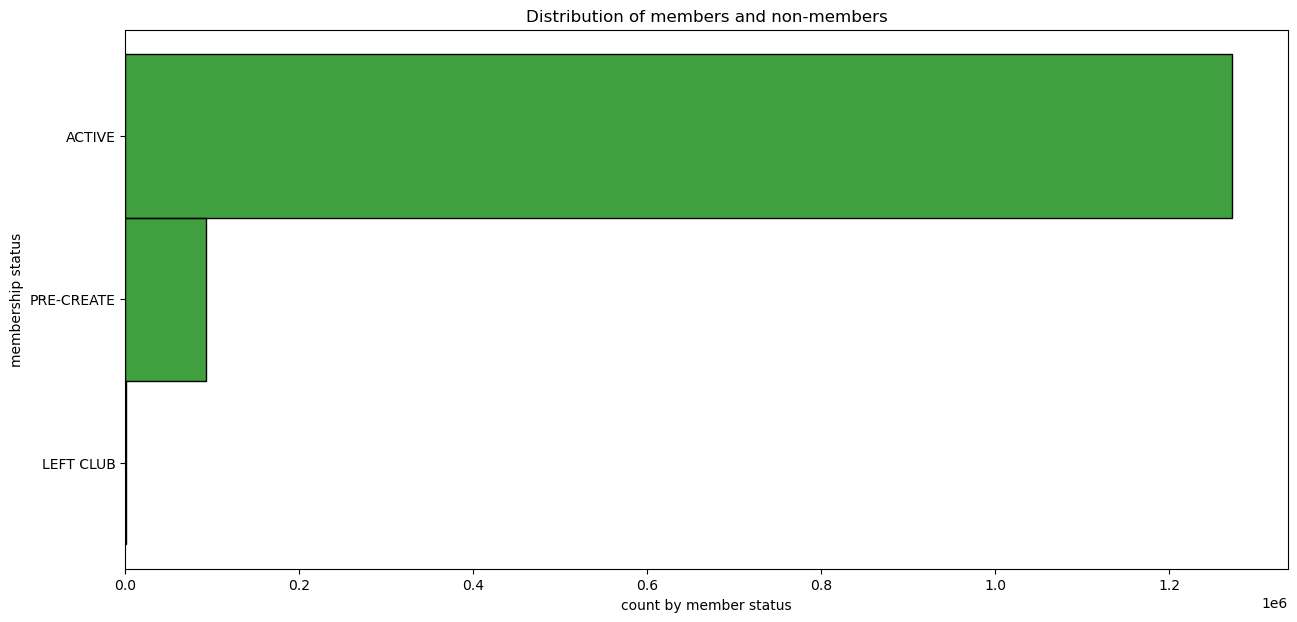

In [38]:
f, ax = plt.subplots(figsize=(15, 7))
plt.title('Distribution of members and non-members') 
ax = sns.histplot(data=customers, y='club_member_status', color='green')
ax.set_xlabel('count by member status')
ax.set_ylabel('membership status')
plt.show()

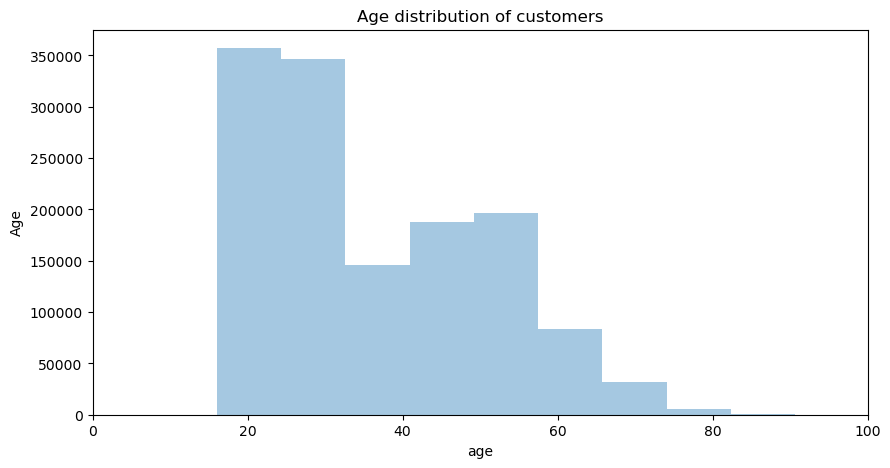

In [39]:
plt.figure(figsize=(10,5))
plt.title('Age distribution of customers') 
plt.xlim(0,100)
plt.xlabel('Number of customers')
plt.ylabel('Age')
sns.distplot(customers['age'],bins=10,kde=False)
plt.show()

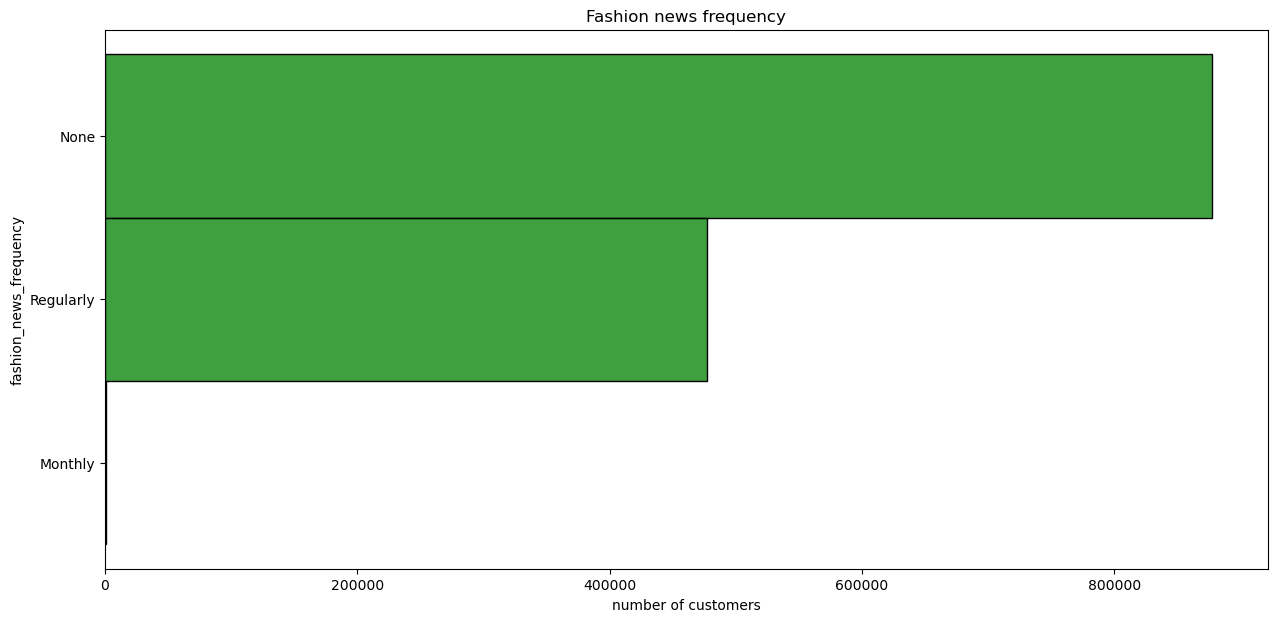

In [40]:
f, ax = plt.subplots(figsize=(15, 7))
plt.title('Fashion news frequency') 
ax = sns.histplot(data=customers, y='fashion_news_frequency', color='green')
ax.set_xlabel('number of customers')
plt.show()

In [41]:
from skimage import io

In [42]:
ic = io.ImageCollection("D:/New folder/FYP/images_128_128/*/*.jpg")


In [43]:
ic = np.array(ic)
ic_flat = ic.reshape((len(ic), -1))

In [44]:
ic.shape 

(105100, 128, 128, 3)

In [45]:
number, m, n, weird = ic.shape  

In [46]:
# VISUALIZING THE PRODUCTS
import ipywidgets as widgets
from ipywidgets import interact

def view_image(n=0):
    plt.imshow(ic[n], cmap='gray', interpolation='nearest')
    plt.show()

w = interact(view_image, n=(0, len(ic)-1))

interactive(children=(IntSlider(value=0, description='n', max=105099), Output()), _dom_classes=('widget-intera…

In [47]:
articles["image_exists"] = 0

In [48]:
for iRow in range(len(articles['article_id'])): 
    article_id = str(articles.iloc[iRow, 0])
    path = "D:/New folder/FYP/images_128_128/0" + str(article_id[:2]) + "/0" +article_id + ".jpg"
    if os.path.isfile(path) == True: 
        articles.iloc[iRow, 25] = 1
articles.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc,image_exists
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.,1
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.,1
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.,1
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde...",1
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde...",1


In [52]:
#RECOMMENDER SYSTEM USING PRODUCT DESCRIPTION
articles = articles.loc[articles['image_exists'] == 1] 
articles = articles.drop('image_exists', 1)

KeyError: 'image_exists'

In [54]:
articles = articles.head(1000)
articles.shape 

(1000, 25)

In [55]:
articles['detail_desc'].head(3)

0    Jersey top with narrow shoulder straps.
1    Jersey top with narrow shoulder straps.
2    Jersey top with narrow shoulder straps.
Name: detail_desc, dtype: object

In [62]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer



# Create the TfidfVectorizer object with stop words
tfidf = TfidfVectorizer(stop_words='english')

# Replace NaN values with an empty string in the 'detail_desc' column
articles['detail_desc'] = articles['detail_desc'].fillna('')

# Compute the TF-IDF matrix by fitting and transforming the 'detail_desc' column
tfidf_matrix = tfidf.fit_transform(articles['detail_desc'])

# Output the shape of the tfidf_matrix
print(tfidf_matrix.shape)

(1000, 513)


In [102]:
import sklearn

# Check the version of scikit-learn
sklearn_version = sklearn.__version__

if sklearn_version < "1.0":
    # Use get_feature_names()
    print(tfidf.get_feature_names()[100:106])
else:
    # Use get_feature_names_out()
    print(tfidf.get_feature_names_out()[100:106])

['cotton' 'cover' 'creases' 'create' 'creates' 'crop']


In [64]:
subset_tfidf_matrix = tfidf_matrix[:1487, :1487]  
cosine_sim = linear_kernel(subset_tfidf_matrix, subset_tfidf_matrix)

In [65]:
cosine_sim.shape

(1000, 1000)

In [66]:
indices = pd.Series(articles.index, index=articles['article_id']).drop_duplicates()

In [67]:
indices[:10]

article_id
108775015    0
108775044    1
108775051    2
110065001    3
110065002    4
110065011    5
111565001    6
111565003    7
111586001    8
111593001    9
dtype: int64

In [68]:
def get_recommendations(article_id, cosine_sim=cosine_sim):
    # Get the index of the article that matches the ID
    idx = indices[article_id]

    # Get the pairwsie similarity scores of all articles with that article
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the articles based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar articles
    sim_scores = sim_scores[11:21]

    # Get the articles indices
    article_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar articles
    return articles['article_id'].iloc[article_indices]

In [69]:
get_recommendations(110065001)


505    253448002
506    253448003
507    253448056
508    253448059
509    253448062
694    286536007
663    280256001
664    280256006
0      108775015
1      108775044
Name: article_id, dtype: int64

In [70]:
indices[:10]

article_id
108775015    0
108775044    1
108775051    2
110065001    3
110065002    4
110065011    5
111565001    6
111565003    7
111586001    8
111593001    9
dtype: int64

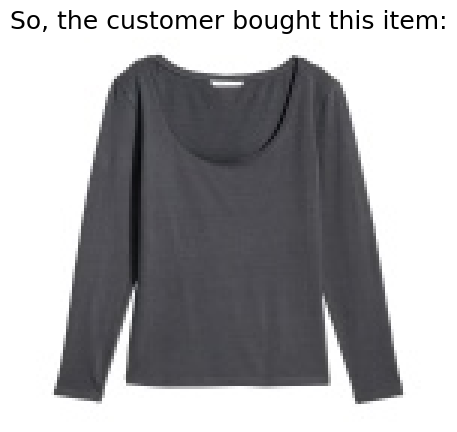

In [76]:
import cv2
BASE = "D:/New folder/FYP/images_128_128/"
item = 116379047 # Test a random item
name1 = BASE+'0'+str(item)[:2]+'/0'+str(item)+'.jpg'
plt.figure(figsize=(20,5))
img1 = cv2.imread(name1)[:,:,::-1]
plt.title('So, the customer bought this item:',size=18)
plt.axis('off')
plt.imshow(img1)

In [77]:
recommendations = get_recommendations(item)
print(recommendations)

425     238197034
396     237222001
397     237222012
398     237222016
204     192460006
1007    310091014
1008    310091017
1009    310091018
1010    310091019
187     189634001
Name: article_id, dtype: int64


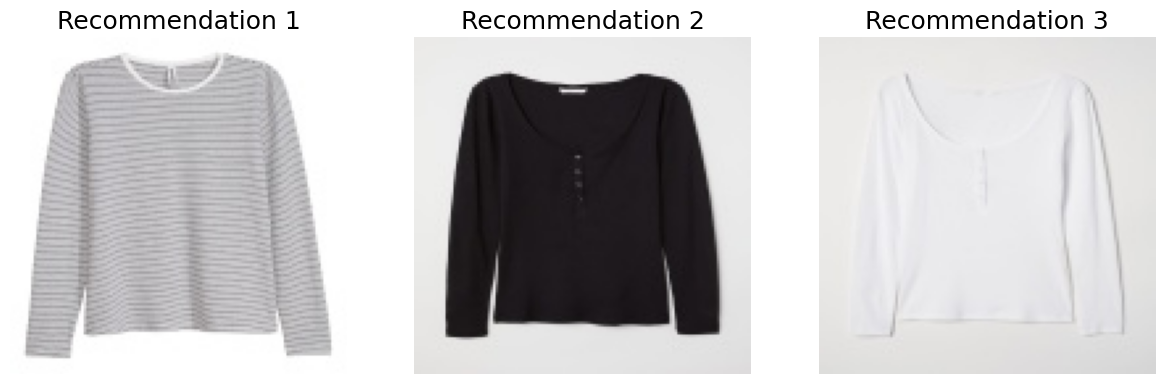

In [78]:
name2 = BASE+'0'+str(recommendations.iloc[0])[:2]+'/0'+str(recommendations.iloc[0])+'.jpg'
name3 = BASE+'0'+str(recommendations.iloc[1])[:2]+'/0'+str(recommendations.iloc[1])+'.jpg'
name4 = BASE+'0'+str(recommendations.iloc[2])[:2]+'/0'+str(recommendations.iloc[2])+'.jpg'

plt.figure(figsize=(20,5))
img2 = cv2.imread(name2)[:,:,::-1]
img3 = cv2.imread(name3)[:,:,::-1]
img4 = cv2.imread(name4)[:,:,::-1]

plt.subplot(1,4,2)
plt.title('Recommendation 1',size=18)
plt.axis('off')
plt.imshow(img2)
plt.subplot(1,4,3)
plt.title('Recommendation 2',size=18)
plt.axis('off')
plt.imshow(img3)
plt.subplot(1,4,4)
plt.title('Recommendation 3',size=18)
plt.axis('off')
plt.imshow(img4)
plt.show() 

In [80]:
# Using deep learning to recommend items
transactions = pd.read_csv("D:/New folder/FYP/Retailers_Dataset.csv")
transactions = transactions.head(2000)
transactions.head()

,Data,customer_id,article_id,price,sales_channel_id
0,9/20/2020,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,9/20/2020,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,9/20/2020,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,9/20/2020,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,9/20/2020,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2


In [82]:
transactions['bought'] = 1 #the interaction matrix will be binary
df=transactions[['customer_id', 'article_id', 'bought']]
df.head()

,customer_id,article_id,bought
0,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,1
1,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,1
2,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,1
3,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,1
4,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,1


In [83]:
df = df.drop_duplicates()

In [84]:
# Creating a sparse pivot table with customers in rows and items in columns
customer_items_matrix_df = df.pivot(index   = 'customer_id', 
                                    columns = 'article_id', 
                                    values  = 'bought').fillna(0)
customer_items_matrix_df.head(10)

article_id,108775015,110065001,111593001,153115039,156231001,156231002,160442007,176550020,179208001,179950001,...,713997001,714373001,714417001,714425001,716519001,719017002,720384002,725253001,728162001,728162002
customer_id,,,,,,,,,,,,,,,,,,,,,
000058a12d5b43e67d225668fa1f8d618c13dc232df0cad8ffe7ad4a1091e318,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00007d2de826758b65a93dd24ce629ed66842531df6699338c5570910a014cc2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00083cda041544b2fbb0e0d2905ad17da7cf1007526fb4c73235dccbbc132280,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0008968c0d451dbc5a9968da03196fe20051965edde7413775c4eb3be9abe9c2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
000aa7f0dc06cd7174389e76c9e132a67860c5f65f970699daccc14425ac31a8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
001127bffdda108579e6cb16080440e89bf1250a776c6e55f56e35e9ee029a8d,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
001ea4e9c54f7e9c88811260d954edc059d596147e1cf8adc73323aebf571fd8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
001fd23db1109a94bba1319bb73df0b479059027c182da490e1161b34cd3af61,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0021da829b898f82269fc51feded4eac2129058ee95bd75bb1591e2eb14ecc79,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [85]:
customer_items_matrix_df.shape

(599, 1496)

In [86]:
customer_items_matrix_df_train, customer_items_matrix_df_test = train_test_split(customer_items_matrix_df,test_size=0.33, random_state=42)
print(customer_items_matrix_df_train.shape, customer_items_matrix_df_test.shape)

(401, 1496) (198, 1496)


In [87]:
customer_items_matrix_df_train.values.mean()*100

0.20520223505407606

In [88]:
def autoEncoder(X):
   

    # Input
    input_layer = Input(shape=(X.shape[1],), name='UserScore')
    
    # Encoder
    # -----------------------------
    enc = Dense(512, activation='selu', name='EncLayer1')(input_layer)

    # Latent Space
    # -----------------------------
    lat_space = Dense(256, activation='selu', name='LatentSpace')(enc)
    lat_space = Dropout(0.8, name='Dropout')(lat_space) # Dropout

    # Decoder
    # -----------------------------
    dec = Dense(512, activation='selu', name='DecLayer1')(lat_space)
    
    # Output
    output_layer = Dense(X.shape[1], activation='linear', name='UserScorePred')(dec)

    # this model maps an input to its reconstruction
    model = Model(input_layer, output_layer)    
    
    return model

In [89]:
X = customer_items_matrix_df_train.values
X.shape[1]
model = autoEncoder(X)

model.compile(optimizer = Adam(lr=0.0001), loss='mse')
    
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 UserScore (InputLayer)      [(None, 1496)]            0         
                                                                 
 EncLayer1 (Dense)           (None, 512)               766464    
                                                                 
 LatentSpace (Dense)         (None, 256)               131328    
                                                                 
 Dropout (Dropout)           (None, 256)               0         
                                                                 
 DecLayer1 (Dense)           (None, 512)               131584    
                                                                 
 UserScorePred (Dense)       (None, 1496)              767448    
                                                                 
Total params: 1,796,824
Trainable params: 1,796,824
Non-train

In [90]:
hist = model.fit(x=X, y=X,
                  epochs=50,# Using 50 here instead of 10 or 20 improved the performance very much!
                  batch_size=64,
                  shuffle=True,
                  validation_split=0.1)


Epoch 1/50
6/6 [==============================] - 3s 191ms/step - loss: 0.0353 - val_loss: 0.0085
Epoch 2/50
6/6 [==============================] - 0s 61ms/step - loss: 0.0221 - val_loss: 0.0066
Epoch 3/50
6/6 [==============================] - 0s 42ms/step - loss: 0.0146 - val_loss: 0.0054
Epoch 4/50
6/6 [==============================] - 0s 43ms/step - loss: 0.0104 - val_loss: 0.0046
Epoch 5/50
6/6 [==============================] - 0s 43ms/step - loss: 0.0075 - val_loss: 0.0041
Epoch 6/50
6/6 [==============================] - 0s 37ms/step - loss: 0.0058 - val_loss: 0.0037
Epoch 7/50
6/6 [==============================] - 0s 37ms/step - loss: 0.0049 - val_loss: 0.0035
Epoch 8/50
6/6 [==============================] - 0s 40ms/step - loss: 0.0041 - val_loss: 0.0033
Epoch 9/50
6/6 [==============================] - 0s 50ms/step - loss: 0.0035 - val_loss: 0.0031
Epoch 10/50
6/6 [==============================] - 0s 49ms/step - loss: 0.0033 - val_loss: 0.0030
Epoch 11/50
6/6 [===========

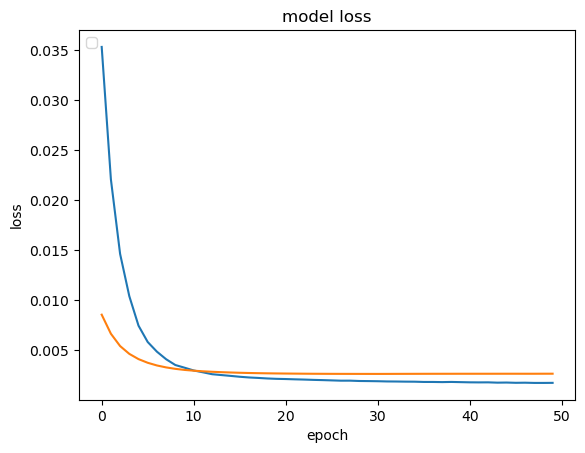

In [91]:
def plot_hist(hist):
    # summarize history for loss
    fig, ax = plt.subplots()  # create figure & 1 axis

    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')

    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])

plot_hist(hist)

In [92]:
new_matrix = model.predict(X) * (X[0] == 0)
# converting the reconstructed matrix back to a Pandas dataframe
new_customer_items_matrix_df  = pd.DataFrame(new_matrix, 
                                            columns = customer_items_matrix_df_train.columns, 
                                            index   = customer_items_matrix_df_train.index)
new_customer_items_matrix_df.head()

13/13 [==============================] - 0s 10ms/step


article_id,108775015,110065001,111593001,153115039,156231001,156231002,160442007,176550020,179208001,179950001,...,713997001,714373001,714417001,714425001,716519001,719017002,720384002,725253001,728162001,728162002
customer_id,,,,,,,,,,,,,,,,,,,,,
08ef984221fd7b8d9d903c991eec3cda5a3af7a82882c82dc9030c4d536a137c,0.000298,0.003112,-0.001544,0.001538,0.006518,0.006448,-0.007718,-0.006202,0.000127,-0.001362,...,-0.001191,0.001068,-0.004786,0.003137,-0.004427,0.002363,0.001539,0.002398,0.000932,0.001185
029ceb992cb63df03c109790046e3fdebfce0b63c968823dd461b7f18ecc6b30,0.043831,-0.009754,-0.007302,0.012591,0.017394,-0.000012,-0.025342,-0.011419,-0.012674,-0.006760,...,-0.025264,-0.016751,0.005873,0.002133,0.006370,0.000297,-0.012574,-0.007529,-0.012758,0.000884
02334389c86031bc841c43b000006162d3bdadd0a88acd650eaebdb3f1beb9c5,0.003727,-0.000985,0.003842,0.006006,0.007664,0.007467,-0.003040,-0.000008,0.007223,-0.003025,...,0.005129,0.007504,0.000173,0.005157,-0.000776,0.001929,0.003642,0.003335,-0.000477,0.005382
07a420b50098f077205a5d56780dd0d946034362b00198f7e5b5114876c29151,-0.003097,0.002481,0.003733,-0.001179,0.009342,0.009168,0.002179,-0.000462,0.003753,-0.000541,...,0.003626,0.005501,-0.004789,0.004535,0.010747,-0.002226,-0.001638,0.000469,-0.002302,0.002546
082fa45b5ed4935d58b92bc9044e5a249772a740d9d2ccae83e9895b5dcbe453,-0.005783,0.004256,0.001681,0.000529,0.002557,0.004101,-0.002324,0.002294,0.001397,-0.000723,...,0.004641,0.001649,-0.004121,0.007850,0.006248,0.000595,0.001176,0.001896,-0.001291,0.002815


In [93]:
print(new_customer_items_matrix_df.values.min(), new_customer_items_matrix_df.values.max())

-0.17245352 0.7353144


In [94]:
def recommender_for_customer(customer_id, interact_matrix, df_content, topn = 10):
    '''
    Recommender Articles for Customers
    '''
    pred_scores = interact_matrix.loc[customer_id].values

    df_scores   = pd.DataFrame({'article_id': list(customer_items_matrix_df.columns), 
                               'score': pred_scores})

    df_rec      = df_scores.set_index('article_id')\
                    .join(df_content.set_index('article_id'))\
                    .sort_values('score', ascending=False)\
                    .head(topn)[['score', 'prod_name']]
    
    return df_rec[df_rec.score > 0]

In [95]:
articles = pd.read_csv("D:/New folder/FYP/articles.csv") 

# EXAMPLE: ARTICLE previously purchased by the customer
recommender_for_customer(customer_id     = '029ceb992cb63df03c109790046e3fdebfce0b63c968823dd461b7f18ecc6b30', 
                         interact_matrix = customer_items_matrix_df, 
                         df_content      = articles)

,score,prod_name
article_id,,
684588001,1.0,Yen.
660618001,1.0,Chicago Twill TRS
692454002,1.0,EDC LAURA LACE TOP
543729003,1.0,Lagos
637255001,1.0,Gloss
657128001,1.0,Paleo
656719005,1.0,Serpente HW slim trouser
696447003,1.0,Flip dress
506110001,1.0,Coated Leggings


In [96]:
recommender_for_customer(customer_id     = '0008968c0d451dbc5a9968da03196fe20051965edde7413775c4eb3be9abe9c2', 
                         interact_matrix = new_customer_items_matrix_df, 
                         df_content      = articles)

,score,prod_name
article_id,,
531310002,0.042074,Drew Cardigan
529841001,0.040431,Lauper Sweater
685687004,0.038653,W YODA KNIT OL OFFER
685687003,0.021311,W YODA KNIT OL OFFER
591334003,0.021034,Flock (1)
608952004,0.020369,Fire
522561002,0.019076,Seine coat
662888001,0.018457,Miranda
654434002,0.017846,Whirlwind Thong Maple Mid


In [97]:
X_test = customer_items_matrix_df_test.values
X_test.shape

(198, 1496)

In [98]:
new_matrix_test = model.predict(X_test) * (X_test[0] == 0)
new_customer_items_matrix_df_test  = pd.DataFrame(new_matrix_test, 
                                            columns = customer_items_matrix_df_test.columns, 
                                            index   = customer_items_matrix_df_test.index)
new_customer_items_matrix_df_test.head()

7/7 [==============================] - 0s 6ms/step


article_id,108775015,110065001,111593001,153115039,156231001,156231002,160442007,176550020,179208001,179950001,...,713997001,714373001,714417001,714425001,716519001,719017002,720384002,725253001,728162001,728162002
customer_id,,,,,,,,,,,,,,,,,,,,,
01f597f5eba83f9709eceb5a70a99f3a4009a6e827bf7293afa4211030a29fa4,-0.044540,-0.002213,0.000313,-0.008965,-0.027033,-0.022273,0.071222,0.003366,-0.030426,-0.015892,...,-0.009151,-0.012003,-0.009997,0.006907,0.003905,0.003341,0.002414,-0.018000,0.022243,-0.020637
077641946a092614f6da9c0ab14ce034907c4e168bd73ae680f423a11c20bf71,-0.281676,-0.016779,-0.001704,-0.023388,-0.014772,0.041779,0.045309,-0.107884,-0.016122,-0.012533,...,-0.004508,0.019363,-0.033573,-0.039519,0.037909,0.048203,-0.072269,-0.033875,-0.002561,-0.015713
0a3d969f9d990f20c038ad8a1b3e4a172e862717f3c992b4d6a8a7cc9f43ad0f,0.088079,0.009448,0.001524,0.008473,-0.023603,-0.007589,0.000128,0.053920,-0.009085,0.011347,...,-0.002315,0.002377,0.002934,0.001927,-0.001540,-0.010482,-0.024574,-0.011821,-0.005827,0.005774
015e83393e4fc3b071ba6fc5f174bf3bf9813c88dcaf3e61e34c6525984d0ed1,-0.029896,0.009667,-0.006059,-0.003088,0.007328,-0.000607,0.002728,-0.016510,-0.016274,-0.022685,...,-0.013019,0.010672,-0.012046,-0.021699,0.020438,-0.012682,0.008036,0.016907,0.011062,0.006184
03176a1445de4730c2ca5d514c3ce2182972ad42dfae65f4549778a2e918a7bd,-0.087620,0.034297,0.027642,-0.008068,0.009669,0.030981,0.047299,0.042225,-0.010810,-0.002393,...,-0.016710,-0.049324,0.001109,0.004447,0.033351,0.017154,-0.000474,0.043010,0.029002,-0.014331


In [99]:
recommendations = recommender_for_customer(customer_id     = '01f597f5eba83f9709eceb5a70a99f3a4009a6e827bf7293afa4211030a29fa4', 
                                           interact_matrix = customer_items_matrix_df_test, 
                                           df_content      = articles)
print(recommendations)

            score         prod_name
article_id                         
657497007     1.0  Bellini price CF
625773001     1.0           Portman
456163026     1.0         Woody (1)
674336001     1.0       Kamikaze CF
676954001     1.0     Memphis Dress


In [100]:
recommendation_indices = recommendations.index.tolist()
print(recommendation_indices)

[657497007, 625773001, 456163026, 674336001, 676954001]


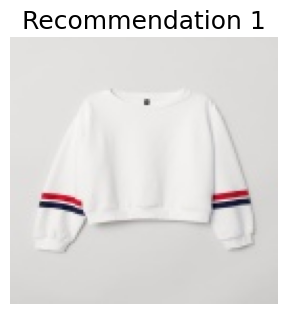

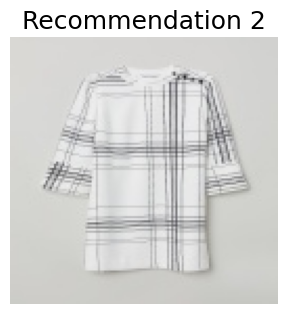

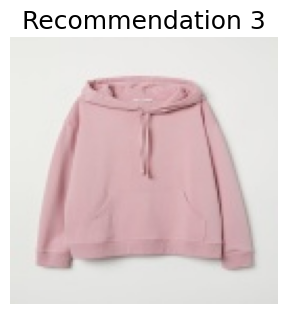

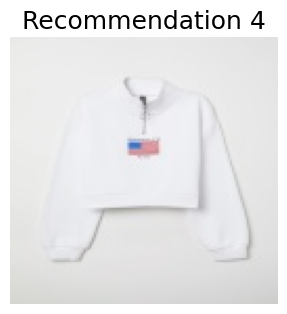

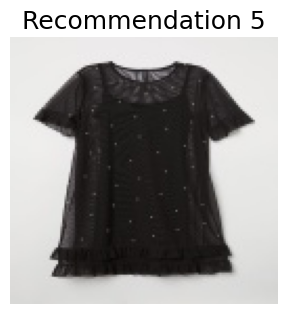

In [101]:
counter = 1

for iRec in recommendation_indices:
    name = BASE+'0'+str(iRec)[:2]+'/0'+str(iRec)+'.jpg'
    plt.figure(figsize=(20,5))
    img = cv2.imread(name)[:,:,::-1]
    plt.subplot(1,5,counter)
    plt.title('Recommendation ' + str(counter),size=18)
    plt.axis('off')
    plt.imshow(img)
    counter = counter + 1